<a href="https://colab.research.google.com/github/1975JHK/Capstone_Project/blob/main/Secondary_Preprocessing_210929.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  C   J   N   Y Sum 
  1 313   6   0 320 


  1   2   3 Sum 
  1 313   6 320 


FALSE 
10240 

[1] "Viscosity"    "React.Time"   "React.Temp"   "Thickness"    "Resin"       
 [6] "Hardener"     "Blower"       "Resin.Temp"   "Speed"        "U.Temp"      
[11] "L.Temp"       "Pressure1"    "Pressure2"    "Pressure3"    "Pressure4"   
[16] "Pressure5"    "Pressure6"    "Pressure7"    "Pressure8"    "Pressure9"   
[21] "Pressure10"   "Pressure11"   "Tissue.Type"  "P1"           "P2"          
[26] "P3"           "Conductivity" "Shrinkage"

[1] 224  28

[1] 96 28


Good  Bad 
 220    4 


Good  Bad 
  92    4 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Viscosity,React.Time,React.Temp,Thickness,Resin,Hardener
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.36514110,-1.10251998,1.9214410,-1.4864619,-2.37985763,0.6078747
0.50938862,0.25920753,0.7176024,0.2550506,0.01696455,-0.8530348
-0.04448659,-0.19325550,-1.4338990,0.5371267,1.62248103,-0.7115754
-0.23002944,-1.96146945,-0.6916707,-0.6795627,-0.10120969,0.9378488
-2.05621293,-0.04548548,-0.5210856,-0.5046297,-2.01490659,-0.1102765


Viscosity,React.Time,React.Temp,Thickness,Resin,Hardener
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.71852849,-0.6020433,0.7227688,-1.2395239,-1.47054187,-0.4644150
0.50835140,1.5000675,-1.1358139,0.7878323,0.04675925,-0.0855857
-1.10839545,-0.1515910,-0.6578926,0.1120469,0.04675925,0.7983493
-0.25151962,-0.9023448,1.5458554,-1.9153092,-1.47054187,0.4195200
-0.07367746,0.7493136,-1.0561603,-0.9016312,-0.96477483,0.6720729


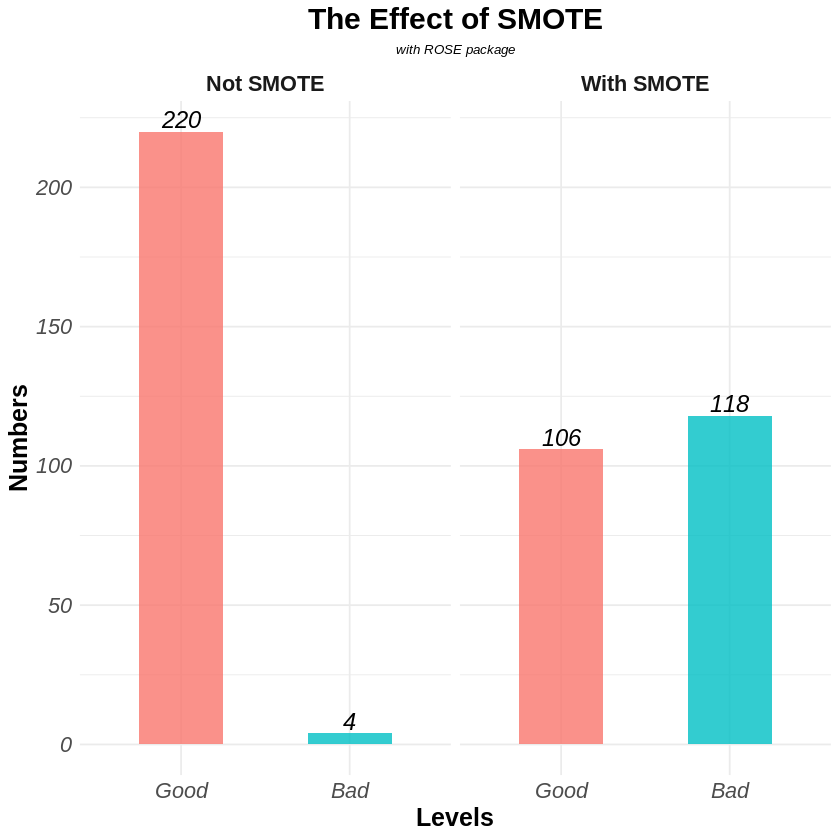

In [9]:
# Secondary Preprocessing
## Encoding Numeric type to Categorical type
### Conductivity
df <- df %>% mutate(
  Conductivity = case_when(
    Conductivity < 0.0200 ~ 'Good',
    Conductivity >= 0.0200 ~ 'Bad',
    TRUE ~ 'NA'))

df$Conductivity <- factor(df$Conductivity,
                          levels = c('Good', 'Bad'),
                          labels = c('Good', 'Bad'))

### Shrinkage
df$Shrinkage <- case_when(df$Shrinkage < -0.70 ~ 'Bad',
                          df$Shrinkage < 0.00 ~ 'Good',
                          TRUE ~ 'NA')

df$Shrinkage <- factor(df$Shrinkage,
                       levels = c('Good', 'Bad'),
                       labels = c('Good', 'Bad'))


### Encoding : Tissue.Type
addmargins(table(df$Tissue.Type))
df$Tissue.Type <- as.numeric(df$Tissue.Type)
addmargins(table(df$Tissue.Type))
table(is.na(df))
df <- na.omit(df)            


## Feature Selection
df <- df[ , -c(1:4)]
colnames(df)


## Splitting the dataset into train and test set
set.seed(33)
index <- sample(1:nrow(df), nrow(df)*0.70, replace = F)
train <- df[index, ]
test <- df[-index, ]
dim(train)
dim(test)
table(train$Conductivity)
table(test$Conductivity)

## Re-balancing Classes of dataset with SMOTE
install.packages('ROSE')
imbalance <- table(train$Conductivity) %>% data.frame() %>% 
  rename(Levels = Var1, Numbers = Freq)

train <- ROSE::ROSE(Conductivity ~ ., data = train[ , c(1:27)])$data

rebalance <- table(train$Conductivity) %>% data.frame() %>% 
  rename(Levels = Var1, Numbers = Freq)

smote_effect <- rbind(imbalance, rebalance) %>% 
  mutate(Remarks = c('Not SMOTE', 'Not SMOTE',
                     'With SMOTE', 'With SMOTE'))

ggplot(data = smote_effect, aes(x = Levels, y = Numbers,
                                fill = Levels))+
  geom_col(width = 0.5, alpha = 0.8,show.legend = F)+
  geom_text(aes(label = Numbers), size = 5, vjust = -0.2,
            fontface = 'italic')+
  ggtitle('The Effect of SMOTE', subtitle = 'with ROSE package')+
  theme(plot.title = element_text(size = 18, face = 'bold', hjust = 0.5),
        plot.subtitle = element_text(size = 8, face = 'italic', hjust = 0.5),
        axis.title = element_text(size = 15, face = 'bold'),
        axis.text = element_text(size = 13, face = 'italic'),
        strip.text.x = element_text(size = 13, face = 'bold'))+
  facet_wrap(~ Remarks)

## Scaling the Features
center <- apply(train[ , -c(27:28)], 2, mean)
scale <- apply(train[ , -c(27:28)], 2, sd)
train[ , -c(27:28)] <- scale(train[ , -c(27:28)], 
                             center = center, scale = scale)
test[ , -c(27:28)] <- scale(test[ , -c(27:28)], 
                            center = center, scale = scale)
head(train[ , 1:6], 5) %>% as.tibble()
head(test[ , 1:6], 5)